# **02.텍스트 사전 준비 작업(텍스트 전처리)-텍스트 정규화**

**텍스트 토큰화**
* 문장 토큰화


In [20]:
from nltk import sent_tokenize
import nltk #마침표, 개행 문자등의 데이터세트
nltk.download('punkt')

text_sample =  'The Matrix is everywhere its all around us, here even in this room. \
 You can see it out your window or on your television. \
 You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text = text_sample)
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* 단어 토큰화

In [21]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)


<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


* 문장, 단어 토큰화 통합

In [22]:
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):
  sentences = sent_tokenize(text)
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


**스톱 워드 제거**

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [25]:
#의미 있는 단어만 추출
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
for sentence in word_tokens:
  filtered_words=[]
  for word in sentence:
    word = word.lower()
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


**Stemming과 Lemmatization**


In [26]:
#Stemming
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [27]:
#Lemmatization
#정확한 원형 단어 추출을 위해 단어의 '품사' 입력.
#lemmatize()의 파라미터로 동사의 경우 'v', 형용사의 경우 'a'를 입력

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

amuse amuse amuse
happy happy
fancy fancy


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **03.Bag of Words - BOW**

**희소 행렬 - COO 형식**
* 사이파이의 sparse 패키지 이용

In [28]:
import numpy as np

dense = np.array([[3,0,1], [0,2,0]])


In [29]:
from scipy import sparse

data = np.array([3,1,2])

row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [30]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

**희소행렬 - CSR 형식**

In [31]:
#csr_matrix 클래스
from scipy import sparse
import numpy as np # numpy import is needed for np.array

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

row_pos_ind = np.array([0,2,7,9,10,12,13])

sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind), shape=dense2.shape)

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [32]:
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

# **05. 감성 분석**
**지도학습 기반 감성 분석 실습-IMDB 영화평**


In [33]:
import pandas as pd

review_df = pd.read_csv('/content/labeledTrainData.tsv', header = 0, sep = "\t", quoting = 3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


* id :각 데이터의 id
* sentiment: 영화평의 Sentiment 결과값. 1-긍정적, 0-부정적 평가
* review: 영화평의 텍스트

In [34]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [35]:
import re
#<br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />', ' ')
# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))


In [36]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size = 0.3, random_state = 156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words = 'english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(solver = 'liblinear', C = 10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8861, ROC-AUC는 0.9503


In [38]:
#TF-IDF 벡터화수행
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))),
    ('lr_clf', LogisticRegression(solver = 'liblinear', C = 10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

예측 정확도는 0.8936, ROC-AUC는 0.9598


**SentiWordNet을 이용한 감성 분석**

In [39]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [40]:
from nltk.corpus import wordnet as wn

term = 'present'

synsets = wn.synsets(term)
print('synsets() 반환 type: ', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)

synsets() 반환 type:  <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [41]:
#같은 언어 다른 의미
for synset in synsets:
  print('##### Synset name: ', synset.name(), '#####')
  print('POS : ', synset.lexname())
  print('Definition:', synset.definition())
  print('Lemmas:', synset.lemma_names())

##### Synset name:  present.n.01 #####
POS :  noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name:  present.n.02 #####
POS :  noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name:  present.n.03 #####
POS :  noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name:  show.v.01 #####
POS :  verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name:  present.v.02 #####
POS :  verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name:  stage.v.01 #####
POS :  verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represen

In [43]:
#어휘 간의 관계 유사도
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

for entity in entities:
  similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
  similarities.append(similarity)

similarity_df = pd.DataFrame(similarities, columns = entity_names, index = entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [44]:
#Senti_Synset 클래스를 리스트 형태로 반환
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type:', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값:', senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값: [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [46]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수:', father.pos_score())
print('father 부정감성 지수:', father.neg_score())
print('father 객관성 지수:', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ', fabulous.pos_score())
print('fabulous 부정감성 지수: ', fabulous.neg_score())

father 긍정감성 지수: 0.0
father 부정감성 지수: 0.0
father 객관성 지수: 1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125


**SentiWordNet을 이용한 영화 감상평 감성 분석**
1. 문서를 문장 단위로 분해
2. 다시 문장을 단어 단위로 토큰화하고 품사 태깅
3. 품사 태깅된 단어 기반으로 synset객체와 senti_synset 객체 생성
4. senti_synset 객체에서 긍정/부정 감성 지수를 구하고 이를 모두 합산해 특정 임계치 값 이상일 때 긍정 감성으로, 그렇지 않을 때는 부정 감성을 결정

In [47]:
#품사 태깅 함수
from nltk.corpus import wordnet as wn

def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [55]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
  sentiment = 0.0
  tokens_count = 0

  lemmatizer = WordNetLemmatizer()
  raw_sentences = sent_tokenize(text)
  for raw_sentence in raw_sentences:
    tagged_sentence = pos_tag(word_tokenize(raw_sentence))
    for word, tag in tagged_sentence:
      wn_tag = penn_to_wn(tag)
      if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        continue
      lemma = lemmatizer.lemmatize(word, pos = wn_tag)
      if not lemma:
        continue

      synsets = wn.synsets(lemma, pos = wn_tag)
      if not synsets:
        continue

      synset = synsets[0]
      swn_synset = swn.senti_synset(synset.name())
      sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
      tokens_count += 1

    if not tokens_count:
      return 0
    if sentiment >=0:
      return 1

    return 0

In [56]:
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target, preds), 4))
print("정밀도:", np.round(precision_score(y_target, preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7669 4831]
 [3635 8865]]
정확도: 0.6614
정밀도: 0.6473
재현율: 0.7092


**VADER를 이요한 감성 분석**
* SentimentIntensityAnalyzer클래스
* 감성 분석 과정
1. SentimentIntensityAnalyzer 객체 생성
2. 문서별로 polarity_scores() 메서드를 호출해 감성 점수를 구한 뒤, 해당 문서의 감성 점수가 특정 임계값 이상이면 긍정, 그렇지 않으면 부정
* polarity_scores() 메서드는 딕셔너리 형태의 감성 점수 반환
* neu = 중립적인 감성지수
* compund는 neg, neu, pos score를 적절히 조합해 -1, 1사이의 감성 지수 표현한 값
* 보통 compound score이 0.1 이상이면 긍정 감성

In [58]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [60]:
def vader_polarity(review, threshold = 0.1):
  analyzer = SentimentIntensityAnalyzer()
  scores = analyzer.polarity_scores(review)

  agg_score = scores['compound']
  final_sentiment = 1 if agg_score >= threshold else 0
  return final_sentiment

review_df['vader_preds'] = review_df['review'].apply(lambda x : vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds  =review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print("정확도:", np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6747  5753]
 [ 1858 10642]]
정확도: 0.6956
정밀도: 0.6491
재현율: 0.8514


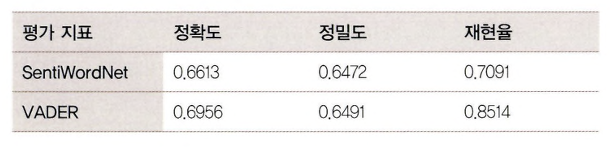